In [1]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: Laura Sofía Sierra Sánchez

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



El valor exacto de f'(x=2) es: 9.88751059921924


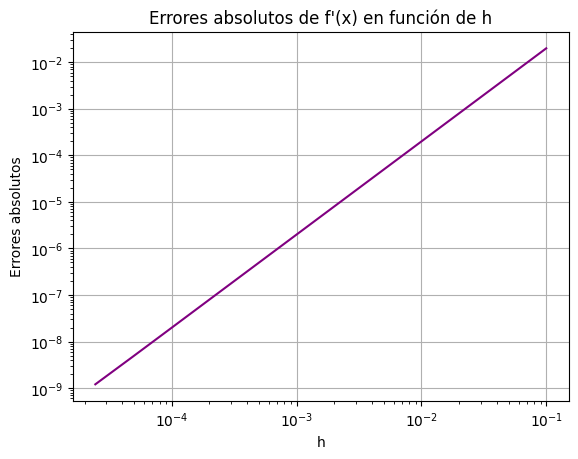

In [7]:
def derivada(f, x, tol=1e-8):
  '''
  Calcular la derivada en x, usando diferencias finitas centrales
  Parámetros:
  - f : función
  - x : punto en el que se evalua la derivada (float)
  - tol : tolerancia (float)
  Retorna:
  - valor_derivada : valor aproximado de la derivada (float)
  - h_valores : lista de valores de h que recorre la derivada
  '''
  h = 0.1
  h_valores = []

  derivada_anterior = 0
  convergencia = False

  while not convergencia:
    valor_derivada = (f(x+h)-f(x-h)) / (2*h)
    h_valores.append(h)

    if len(h_valores) > 1:
      error = abs(valor_derivada - derivada_anterior)
      if error < tol:
        convergencia = True

    derivada_anterior = valor_derivada
    h /= 2

  return valor_derivada, h_valores

# Definir con la función dada f(x) = 3^x
f = lambda x: 3**x
x = 2
valor_derivada, h_valores = derivada(f, x)

# Derivada exacta de f(x)
derivada_exacta = (3**x) * np.log(3)

print("El valor exacto de f'(x=2) es:", valor_derivada)

# Errores absolutos de cada h
errores = []
for h in h_valores:
  derivada_aprox = (f(x+h)-f(x-h)) / (2*h)
  error = abs(derivada_aprox - derivada_exacta)
  errores.append(error)

# Graficar
plt.loglog(h_valores, errores, color='purple')
plt.title("Errores absolutos de f'(x) en función de h")
plt.ylabel('Errores absolutos')
plt.xlabel('h')
plt.grid()
plt.show()



## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



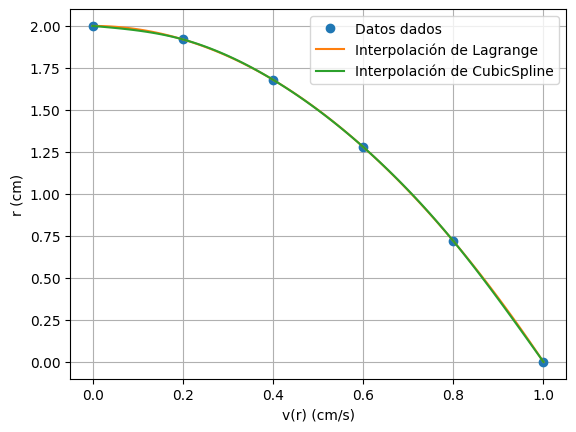

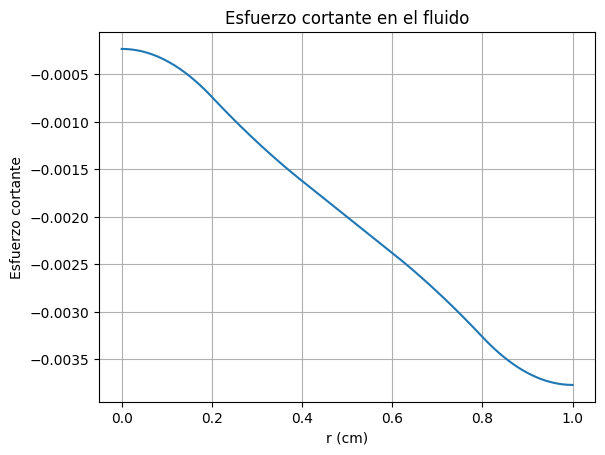

In [19]:
# Datos dados
r = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
v = np.array([2.00, 1.92, 1.68, 1.28, 0.72, 0.00])

# Punto a
polinomio_lagrange = lagrange(r, v)

# Punto b
r_vals = np.linspace(0, 1, 100)
v_lag = polinomio_lagrange(r_vals)

inter_cs = CubicSpline(r, v, bc_type='natural')
v_cs = inter_cs(r_vals)

plt.plot(r, v, 'o', label='Datos dados')
plt.plot(r_vals, v_lag, label='Interpolación de Lagrange')
plt.plot(r_vals, v_cs, label='Interpolación de CubicSpline')
plt.ylabel('r (cm)')
plt.xlabel('v(r) (cm/s)')
plt.legend()
plt.grid()
plt.show()

# Punto c
h = 1e-4
r_grad = np.arange(0, 1 + h, h)
v_interp = inter_cs(r_grad)
derivada = np.gradient(v_interp, h)

# Punto d
mu = 0.001
esfuerzo = mu * derivada
plt.plot(r_grad, esfuerzo)
plt.title('Esfuerzo cortante en el fluido')
plt.xlabel('r (cm)')
plt.ylabel("Esfuerzo cortante")
plt.grid()
plt.show()

# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [ ]:
def densidad(x, y, z):
  return x * y * z

def integrando_z(z, x, y):
  return densidad(x, y, z)

def integrando_y(y, x):
  return quad()